# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

##Problem Statement
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

##Objective:
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

Do the users spend more time on the new landing page than on the existing landing page?
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Does the converted status depend on the preferred language?
Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/BStat/abtest.csv"
df = pd.read_csv(path)

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
df

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


In [ ]:
df.shape

(100, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [ ]:
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [ ]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

### Univariate Analysis

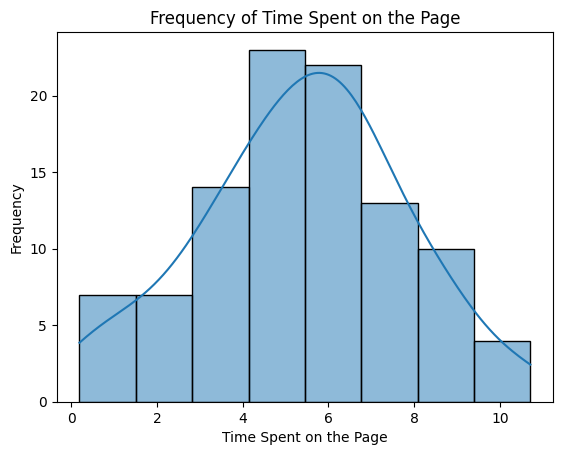

In [ ]:
sns.histplot(df['time_spent_on_the_page'], kde=True)
plt.title('Frequency of Time Spent on the Page')
plt.xlabel('Time Spent on the Page')
plt.ylabel('Frequency')
plt.show()

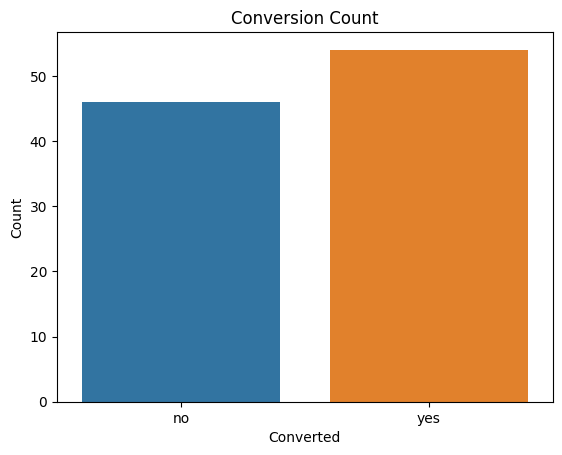

In [ ]:
sns.countplot(data=df, x='converted')
plt.title('Conversion Count')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.show()

In [ ]:
lang_counts = df['language_preferred'].value_counts()

lang_counts

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

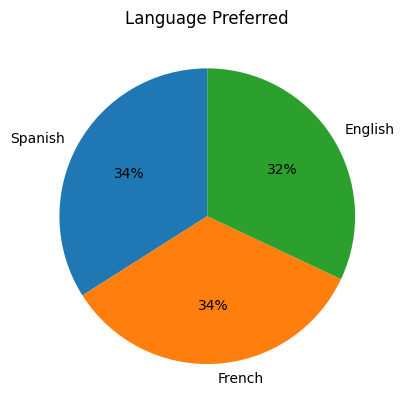

In [ ]:
plt.pie(lang_counts, labels=lang_counts.index, autopct='%1.0f%%', startangle=90)
plt.title('Language Preferred')
plt.show()

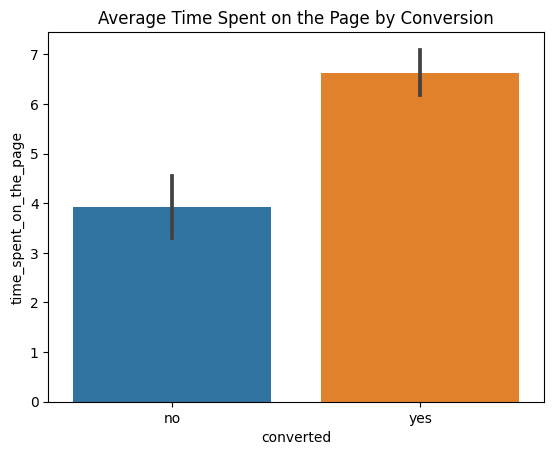

In [ ]:
sns.barplot(data=df, x='converted', y='time_spent_on_the_page')
plt.title('Average Time Spent on the Page by Conversion')
plt.show()

In [ ]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

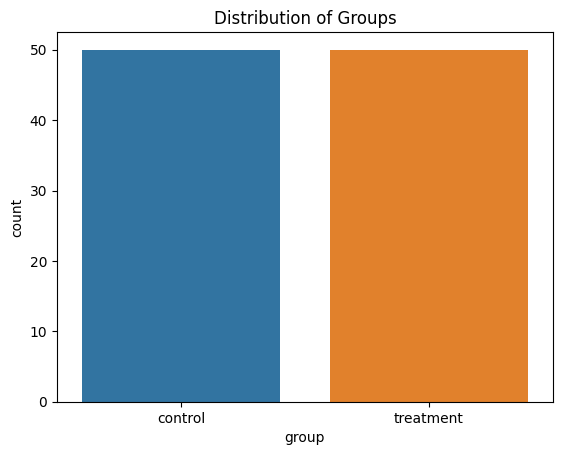

In [ ]:
sns.countplot(data=df, x='group')
plt.title('Distribution of Groups')
plt.show()

In [ ]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

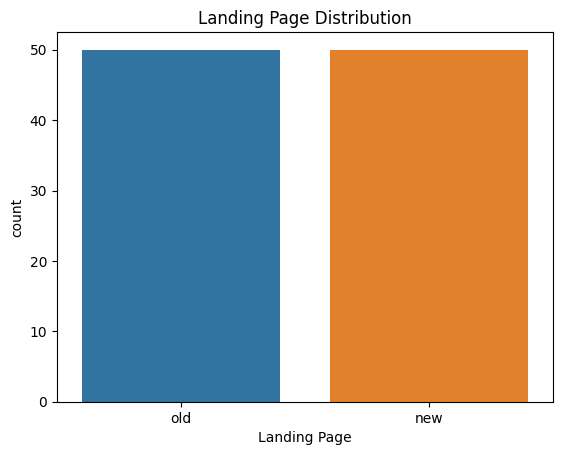

In [ ]:
sns.countplot(data=df, x='landing_page')
plt.title('Landing Page Distribution')
plt.xlabel('Landing Page')
plt.show()

### Bivariate Analysis

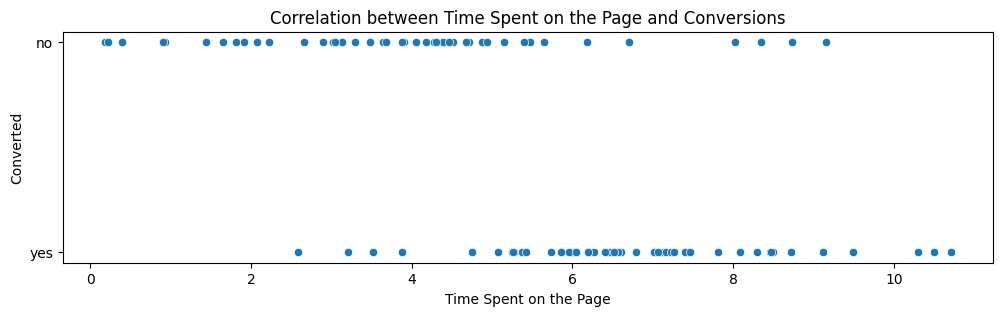

In [ ]:
plt.figure(figsize=(12,3))
sns.scatterplot(data=df, x='time_spent_on_the_page', y='converted')
plt.title('Correlation between Time Spent on the Page and Conversions')
plt.xlabel('Time Spent on the Page')
plt.ylabel('Converted')
plt.show()

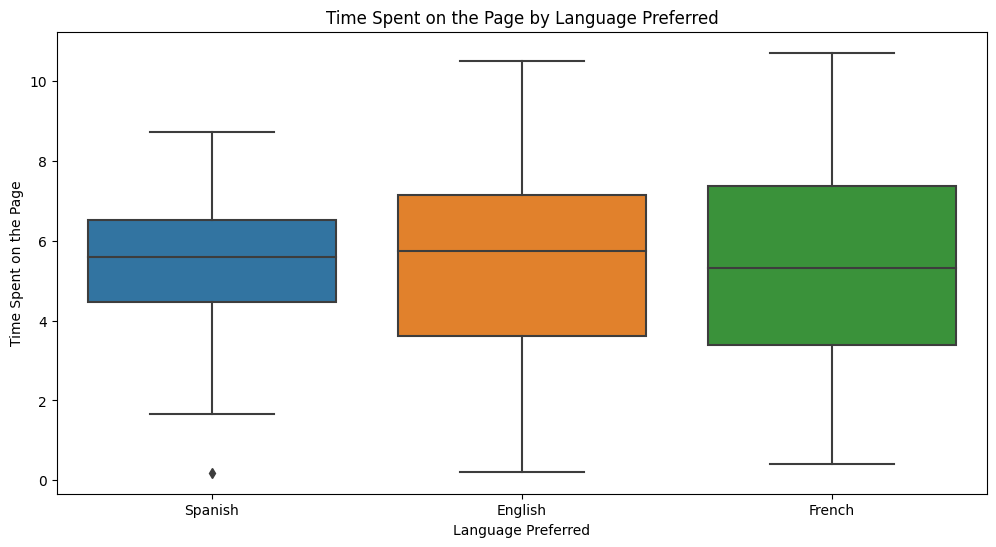

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page')
plt.title('Time Spent on the Page by Language Preferred')
plt.xlabel('Language Preferred')
plt.ylabel('Time Spent on the Page')
plt.show()

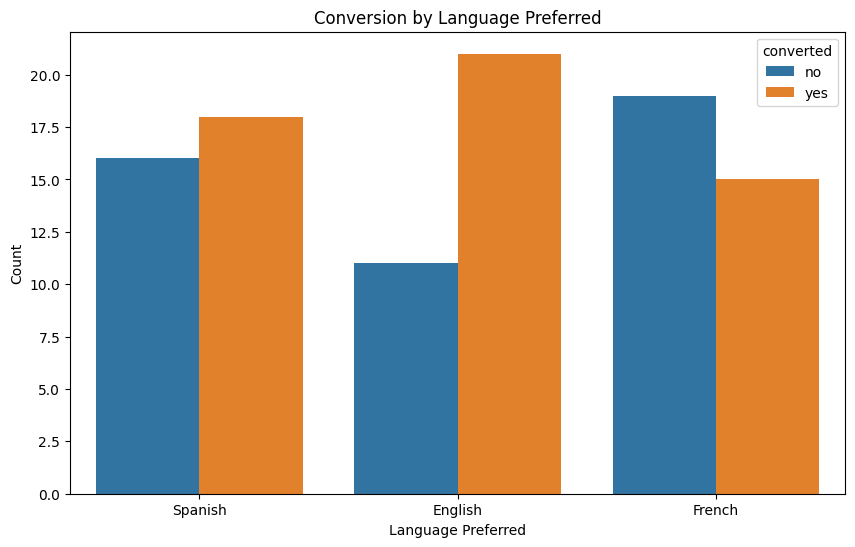

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='language_preferred', hue='converted')
plt.title('Conversion by Language Preferred')
plt.xlabel('Language Preferred')
plt.ylabel('Count')
plt.show()

<ipython-input-22-8c9fda0c5699>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='inferno', linewidth=.5)


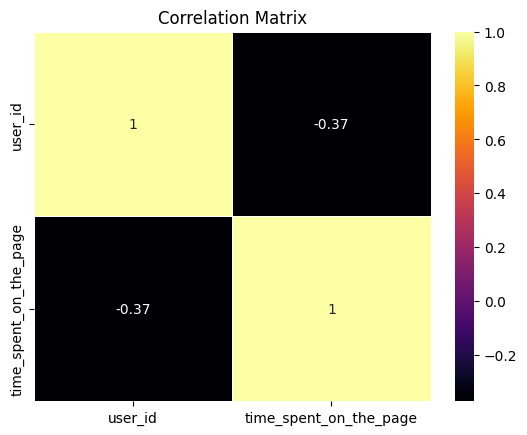

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='inferno', linewidth=.5)
plt.title('Correlation Matrix')
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

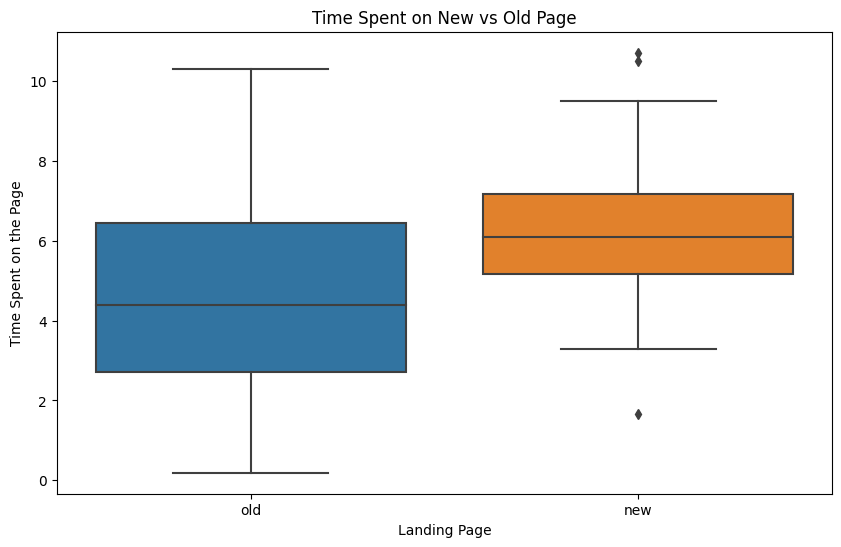

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.title('Time Spent on New vs Old Page')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent on the Page')
plt.show()

In [ ]:
median_old = df[df['landing_page']=='old']['time_spent_on_the_page'].median()
median_new = df[df['landing_page']=='new']['time_spent_on_the_page'].median()

In [ ]:
median_old

4.38

In [ ]:
median_new

6.105

### Step 1: Define the null and alternate hypotheses

$μ_1$= mean time spent on the old landing page

$μ_2$ = mean time spent on the new landing page


$H_0$: $μ_1 ≥ \mu_2$

$H_a$: $μ_1 < μ_2$

### Step 2: Select Appropriate test

An appropriate test would be the **two-sample t-test**

### Step 3: Decide the significance level

I will use a significance level of 0.05

### Step 4: Collect and prepare data

In [ ]:
df_newtime = df[df['landing_page']=='treatment']['time_spent_on_the_page']
df_oldtime = df[df['landing_page']=='control']['time_spent_on_the_page']

In [ ]:
print(df_newtime.std())
print(df_oldtime.std())

nan
nan


### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(df_newtime, df_oldtime, equal_var = False, alternative = 'greater')
print('P-value: ', p_value)

P-value:  nan


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value nan is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Therefore, we can determine that the mean time spent on the old page is less than the mean time spent on the new page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

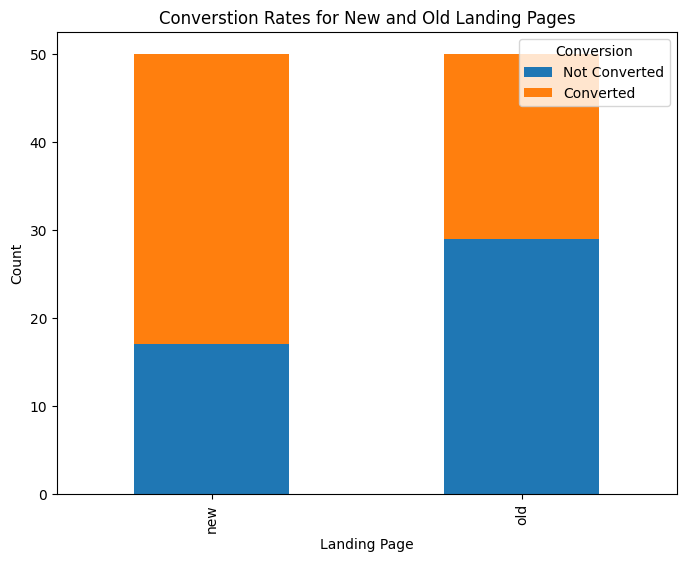

In [ ]:
conversion_counts = df.groupby(['landing_page','converted']).size().unstack()

conversion_counts.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Converstion Rates for New and Old Landing Pages')
plt.xlabel('Landing Page')
plt.ylabel('Count')
plt.legend(title='Conversion', loc='upper right', labels=['Not Converted', 'Converted'])

plt.show()

$\delta_1$= conversion rate for the new landing page

$\delta_2$ = conversion rate for the old landing page


$H_0$: $\delta_1 ≤ \delta_2$

$H_a$: $\delta_1 > \delta_2$

**The appropriate test would be the two-sample z-test for proportions.**

I will use a significance level of 0.05

In [ ]:
conv_new = df[df['group']=='treatment']['converted'].value_counts()['yes']
conv_old = df[df['group']=='control']['converted'].value_counts()['yes']

total_t = df.group.value_counts()['treatment']
total_c = df.group.value_counts()['control']

In [ ]:
print("Total amount using the old page: ", total_c)
print("Total amount using the new page: ", total_t)

Total amount using the old page:  50
Total amount using the new page:  50


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, p_value = proportions_ztest([conv_new, conv_old] , [total_t, total_c], alternative ='larger')
print('P-value: ', p_value)

P-value:  0.008026308204056278


In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


Since the p-value is less than the 5% significance level, we reject the null hypothesis. This shows that we have enough statistical evidence to determine that the conversion rate for the new landing page is greater than the conversion rate for the old landing page.

## 3. Is the conversion and preferred language are independent or related?

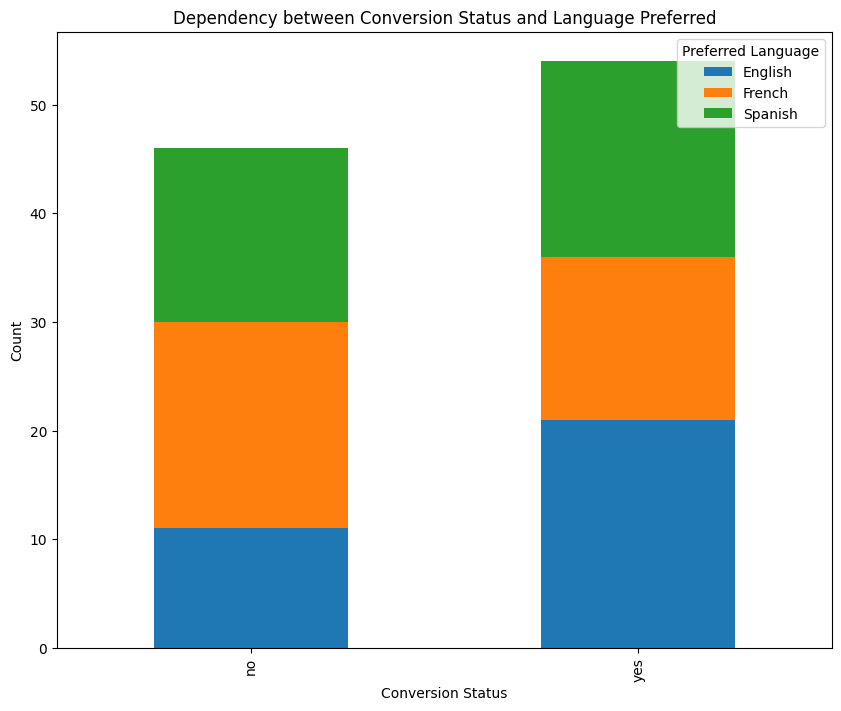

In [ ]:
dependency = pd.crosstab(df['converted'], df['language_preferred'])

dependency.plot(kind='bar', stacked=True, figsize=(10,8))
plt.title('Dependency between Conversion Status and Language Preferred')
plt.xlabel('Conversion Status')
plt.ylabel('Count')
plt.legend(title='Preferred Language', loc='upper right', labels=dependency.columns)

plt.show()

$H_0$: Conversion status and Language Preferred are independent

$H_a$: Conversion status and Language Preferred are not independent (they are related)

**The appropriate test would be the chi-squared test.**

I will use a significance level of 0.05

In [ ]:
dependency

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [ ]:
from scipy.stats import chi2_contingency

chi2_stat, p_value, dof, expected = chi2_contingency(dependency)

print('P-value:', p_value)

P-value: 0.21298887487543447


In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. This suggests that we do not have enough statistical evidence to say whether there is a relation between the conversion status and langauge preferred or if they are independent.

## 4. Is the time spent on the new page same for the different language users?

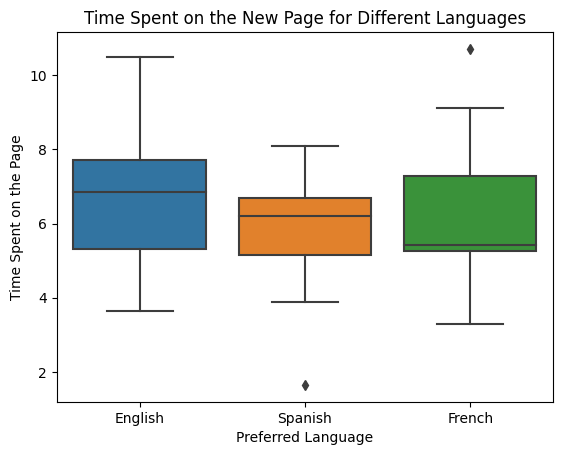

In [ ]:
np_data = df[df['landing_page']=='new']

sns.boxplot(data=np_data, x='language_preferred', y='time_spent_on_the_page')
plt.title('Time Spent on the New Page for Different Languages')
plt.xlabel('Preferred Language')
plt.ylabel('Time Spent on the Page')
plt.show()

$μ_1$= population mean for language 1

$μ_2$ = population mean for language 2

$\mu_3$ = population mean for langauge 3


$H_0$: $μ_1 = \mu_2 = μ_3$

$H_a$: At least one $μ_n$ is different from the others

**The appropriate test would be the ANOVA test**

I will use a significance level of 0.05

In [ ]:
time_E = np_data[np_data['language_preferred']=='English']['time_spent_on_the_page']
time_S = np_data[np_data['language_preferred']=='Spanish']['time_spent_on_the_page']
time_F = np_data[np_data['language_preferred']=='French']['time_spent_on_the_page']

In [ ]:
from scipy.stats import f_oneway

np_data = df[df['landing_page'] == 'new']

language_groups = [group['time_spent_on_the_page'].values for name, group in np_data.groupby('language_preferred')]
f_statistic, p_value = f_oneway(time_E, time_S, time_F)
print('P-value:', p_value)


P-value: 0.43204138694325955


In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. This suggests that we do not have enough statistical evidence to conclude that there are differences in the mean time spent on the new page across different language groups.

## Conclusion and Business Recommendations

Let's go over a few of the things we learned from the data:


*   There was an almost perfectly equal split between which language was preferred.
*   Users who were converted to a subscriber of the news portal spent more time on the page on average


1.   The mean time spent on the new page is greater than the mean time spent on the old page.
2.   The conversion rate for the new landing page is greater than the conversion rate for the old landing page.
3.   There is a possibility that conversion and preferred langauge are related, though this does not rule out the fact that they may be independent.
4.   There is no determined evidence that the time spent on the new page is the same for the different language users..





___

In [ ]:
%%shell
jupyter nbconvert --to html //content/ENews_Express_Project_FullCode.ipynb

[NbConvertApp] Converting notebook //content/ENews_Express_Project_FullCode.ipynb to html
[NbConvertApp] Writing 1066886 bytes to //content/ENews_Express_Project_FullCode.html
